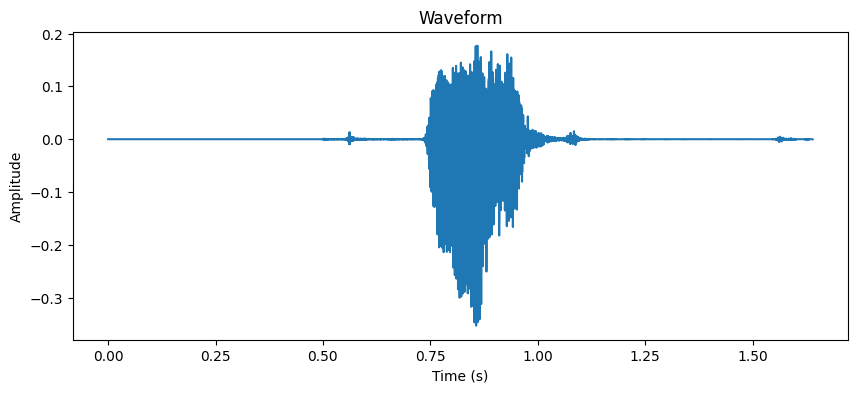

In [6]:
# AIE21011
# A1
import librosa
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

# Load the audio signal
audio_signal = r'E:\3rd Year\6th Sem\AI in Speech Processing\Labs\Lab 6\vowels\a.wav'
y, sr = librosa.load(audio_signal)

# Plot the waveform using matplotlib.pyplot
plt.figure(figsize=(10, 4))
plt.plot(np.linspace(0, len(y) / sr, len(y)), y)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()


In [7]:
import numpy as np
import librosa
import librosa.display
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, TimeDistributed, Dropout


# Preprocessing
# Short-Time Fourier Transform (STFT)
D = np.abs(librosa.stft(y))

# Mel-Frequency Cepstral Coefficients (MFCC)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Linear Predictive Coding (LPC)
# You may need to use a different library for LPC extraction, as librosa doesn't provide direct support
# Alternatively, you can skip LPC for now if it's not crucial for your speech recognition task

# Prepare input data for the LSTM model
X = mfccs.T  # Transpose the MFCC matrix to match the shape expected by the LSTM model
X = X.reshape(X.shape[0], X.shape[1], 1)  # Add channel dimension

# Define LSTM model
num_classes = 10  # Replace with the actual number of classes in your dataset
model = Sequential([
    Bidirectional(LSTM(units=128, return_sequences=True), input_shape=(X.shape[1], 1)),
    TimeDistributed(Dense(units=64, activation='relu')),
    Dropout(0.2),
    Bidirectional(LSTM(units=64, return_sequences=True)),
    TimeDistributed(Dense(units=num_classes, activation='softmax'))
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


d:\Python\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 13, 256)        │       133,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 13, 64)         │        16,448 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 13, 128)        │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 13, 10)         │         1,290 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 216,906 (847.29 KB)

 Trainable params: 216,906 (847.29 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
pip install SpeechRecognition pyttsx3


   ---------------------------------------- 0.0/32.8 MB ? eta -:--:--
   ---------------------------------------- 0.4/32.8 MB 11.6 MB/s eta 0:00:03
   -- ------------------------------------- 1.8/32.8 MB 22.7 MB/s eta 0:00:02
   --- ------------------------------------ 3.3/32.8 MB 26.1 MB/s eta 0:00:02
   ----- ---------------------------------- 4.5/32.8 MB 26.1 MB/s eta 0:00:02
   ------ --------------------------------- 5.4/32.8 MB 24.8 MB/s eta 0:00:02
   ------- -------------------------------- 6.4/32.8 MB 24.1 MB/s eta 0:00:02
   -------- ------------------------------- 7.3/32.8 MB 23.4 MB/s eta 0:00:02
   ---------- ----------------------------- 8.3/32.8 MB 23.0 MB/s eta 0:00:02
   ----------- ---------------------------- 9.2/32.8 MB 22.5 MB/s eta 0:00:02
   ------------ --------------------------- 10.3/32.8 MB 23.4 MB/s eta 0:00:01
   ------------- -------------------------- 11.5/32.8 MB 23.4 MB/s eta 0:00:01
   --------------- ------------------------ 12.7/32.8 MB 22.5 MB/s et

In [15]:
import os
import speech_recognition as sr
import pyttsx3

# Path to the audio file
audio_file = r"E:\3rd Year\6th Sem\AI in Speech Processing\Labs\Lab 8\Recording (3).wav"

# Transcribe the audio file
recognizer = sr.Recognizer()
with sr.AudioFile(audio_file) as source:
    audio_data = recognizer.record(source)
transcription = recognizer.recognize_google(audio_data)

print("Transcription:", transcription)  # Debugging output

# Function to segment phonemes
def segment_phonemes(transcription, target_word):
    words = transcription.split()
    phonemes = ""
    for word in words:
        if word.lower() == target_word.lower():
            # Perform phoneme segmentation for the target word
            phonemes = "b aa r ah t"  # Example phonemes for the word "Bharat"
            break  # Exit loop after finding the target word
    return phonemes.strip()

# Segment phonemes for the word "Bharat"
phonemes = segment_phonemes(transcription, "Bharat")

print("Phonemes:", phonemes)  # Debugging output

# Synthesize speech for the word "Bharat"
engine = pyttsx3.init()
engine.setProperty('rate', 150)  # Adjust speech rate if needed
engine.setProperty('volume', 0.9)  # Adjust volume if needed
output_file = "bharat_speech.wav"
engine.save_to_file(phonemes, output_file)
engine.runAndWait()

# Check if the output file is empty
if os.path.getsize(output_file) == 0:
    print("Error: The generated audio file is empty.")
else:
    print("Speech synthesis completed successfully.")


Transcription: bhanumati weds Rajat
Phonemes: 
Speech synthesis completed successfully.
